In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
os.chdir("C:\\Users\\user\\Desktop\\ML Files")

In [4]:
df = pd.read_csv('zoo.csv')

In [5]:
df.drop(['animal_name'],axis=1,inplace=True)

In [6]:
X= df.drop(['class_type'], axis=1)
y= df['class_type']

In [7]:
#  Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

#  Instantiate object
ss = StandardScaler()

#  Train object on data
ss.fit(X)

#  Trandform data
X = ss.transform(X)

StandardScaler()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )
X_train.shape  
print()
X_test.shape   
print()

(70, 16)

(31, 16)

In [9]:
ct = dtree(
           criterion="gini",    
           max_depth=None       
                              
           )

In [10]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_te = ct.predict(X_test)

In [12]:
np.sum((y_test == y_te))/y_test.size 

0.9354838709677419

In [14]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


<Figure size 1080x1080 with 0 Axes>

[Text(597.8571428571429, 733.86, 'node #0\nmilk <= 0.192\ngini = 0.762\nsamples = 70\nvalue = [28, 14, 3, 9, 3, 6, 7]\nclass = 1'),
 Text(478.2857142857143, 570.78, 'node #1\nfeathers <= 0.758\ngini = 0.785\nsamples = 42\nvalue = [0, 14, 3, 9, 3, 6, 7]\nclass = 2'),
 Text(358.7142857142857, 407.70000000000005, 'node #2\nfins <= 0.887\ngini = 0.765\nsamples = 28\nvalue = [0, 0, 3, 9, 3, 6, 7]\nclass = 4'),
 Text(239.14285714285714, 244.62, 'node #3\nairborne <= 0.616\ngini = 0.715\nsamples = 19\nvalue = [0, 0, 3, 0, 3, 6, 7]\nclass = 7'),
 Text(119.57142857142857, 81.54000000000008, '\n  (...)  \n'),
 Text(358.7142857142857, 81.54000000000008, '\n  (...)  \n'),
 Text(478.2857142857143, 244.62, 'node #14\ngini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0, 0, 0]\nclass = 4'),
 Text(597.8571428571429, 407.70000000000005, 'node #15\ngini = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0, 0, 0]\nclass = 2'),
 Text(717.4285714285714, 570.78, 'node #16\ngini = 0.0\nsamples = 28\nvalue = [28, 0, 0, 0,

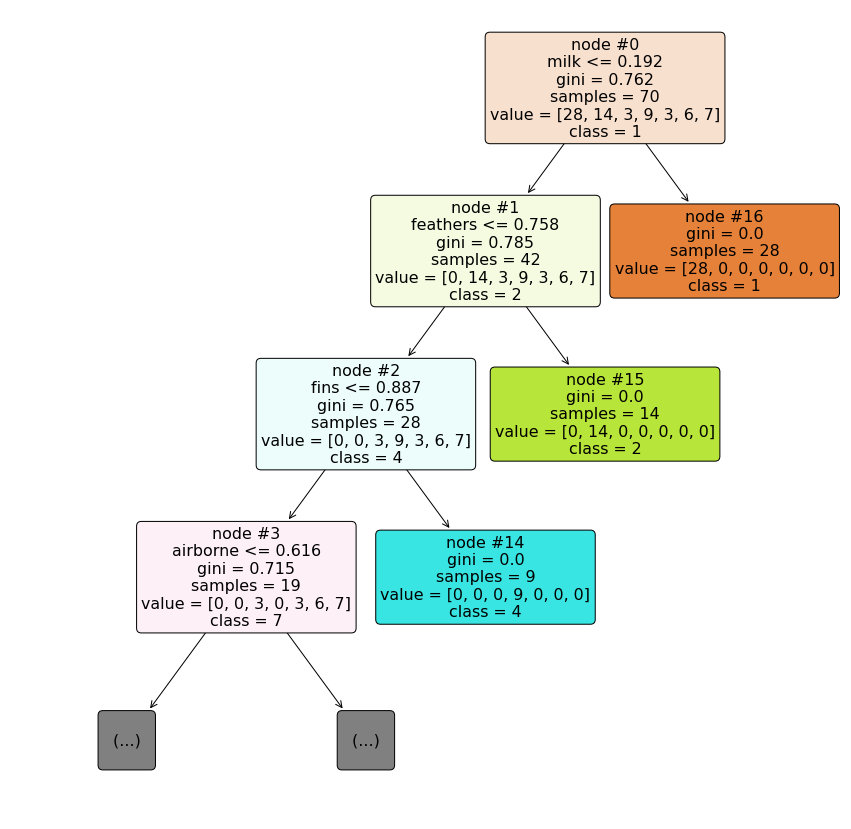

In [18]:
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[0:15],
            class_names = ["1","2","3","4","5","6","7"]
            )

plt.show()

In [19]:

ct = dtree(
           criterion="entropy",    
           max_depth=None       
                              
           )

In [21]:
ct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(502.20000000000005, 733.86, 'node #0\nmilk <= 0.192\nentropy = 2.399\nsamples = 70\nvalue = [28, 14, 3, 9, 3, 6, 7]\nclass = 1'),
 Text(418.5, 570.78, 'node #1\ntoothed <= -0.213\nentropy = 2.38\nsamples = 42\nvalue = [0, 14, 3, 9, 3, 6, 7]\nclass = 2'),
 Text(251.10000000000002, 407.70000000000005, 'node #2\nfeathers <= 0.758\nentropy = 1.478\nsamples = 27\nvalue = [0, 14, 0, 0, 0, 6, 7]\nclass = 2'),
 Text(167.4, 244.62, 'node #3\nairborne <= 0.616\nentropy = 0.996\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 6, 7]\nclass = 7'),
 Text(83.7, 81.54000000000008, '\n  (...)  \n'),
 Text(251.10000000000002, 81.54000000000008, '\n  (...)  \n'),
 Text(334.8, 244.62, 'node #10\nentropy = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0, 0, 0]\nclass = 2'),
 Text(585.9, 407.70000000000005, 'node #11\nbreathes <= -0.72\nentropy = 1.371\nsamples = 15\nvalue = [0, 0, 3, 9, 3, 0, 0]\nclass = 4'),
 Text(502.20000000000005, 244.62, 'node #12\nentropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0, 0, 0]\ncla

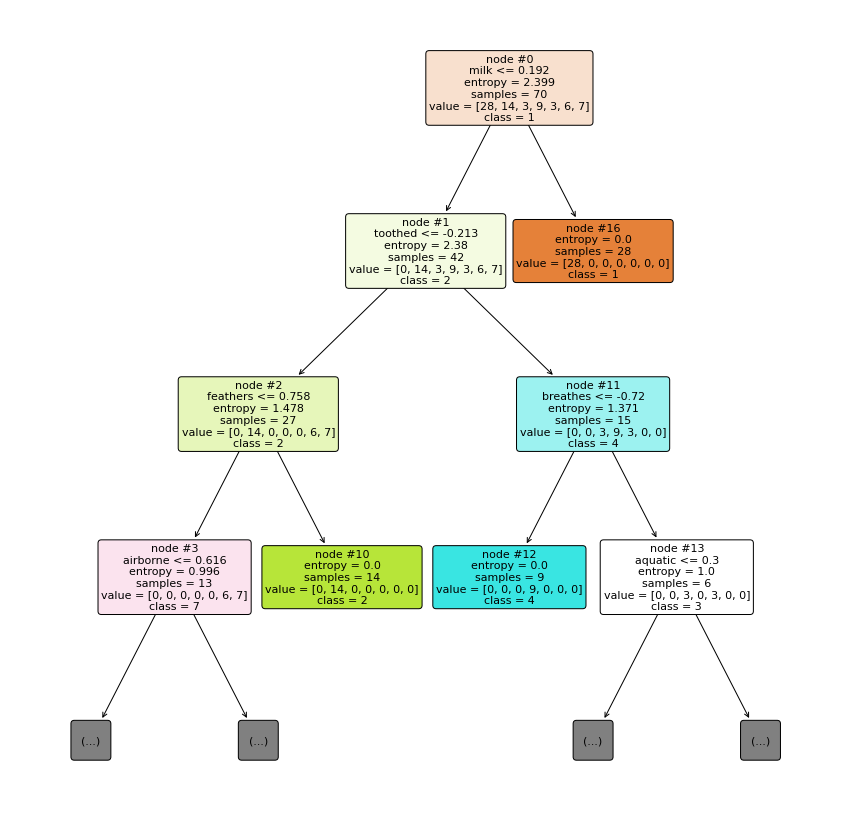

In [22]:
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[0:15],
            class_names = ["1","2","3","4","5","6","7"]
            )

plt.show()

In [23]:
#Remove just two rows and decision tree changes:


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )
ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
ct1.fit(X_train[2:,:],y_train[2:])

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(502.20000000000005, 733.86, 'node #0\nmilk <= 0.192\nentropy = 2.399\nsamples = 70\nvalue = [28, 14, 3, 9, 3, 6, 7]\nclass = 1'),
 Text(418.5, 570.78, 'node #1\ntoothed <= -0.213\nentropy = 2.38\nsamples = 42\nvalue = [0, 14, 3, 9, 3, 6, 7]\nclass = 2'),
 Text(251.10000000000002, 407.70000000000005, 'node #2\nfeathers <= 0.758\nentropy = 1.478\nsamples = 27\nvalue = [0, 14, 0, 0, 0, 6, 7]\nclass = 2'),
 Text(167.4, 244.62, 'node #3\nairborne <= 0.616\nentropy = 0.996\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 6, 7]\nclass = 7'),
 Text(83.7, 81.54000000000008, '\n  (...)  \n'),
 Text(251.10000000000002, 81.54000000000008, '\n  (...)  \n'),
 Text(334.8, 244.62, 'node #10\nentropy = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0, 0, 0]\nclass = 2'),
 Text(585.9, 407.70000000000005, 'node #11\nbreathes <= -0.72\nentropy = 1.371\nsamples = 15\nvalue = [0, 0, 3, 9, 3, 0, 0]\nclass = 4'),
 Text(502.20000000000005, 244.62, 'node #12\nentropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0, 0, 0]\ncla

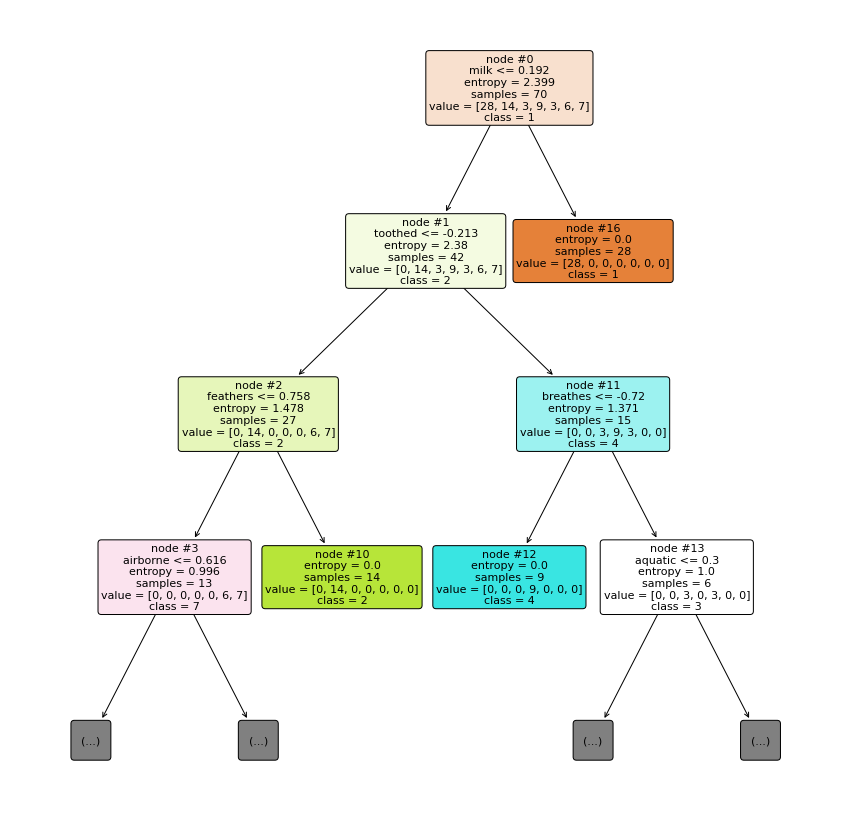

In [24]:
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[0:15],
            class_names = ["1","2","3","4","5","6","7"]
            )

plt.show()

In [25]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.9354838709677419